# A faire:

- data fram ratio --> pca remplir fichier
prendre des données complètes, les rendre incomplètes et comparer les résultats 
Tester sur les différents modèles de véhicules 
tester d'abord sur les ratios 3/6 6/12 12/24 ca va surement pas etre assez donc tester avec les 1/2 2/3 3/4 ... 
faire des jolis plot 
- peut etre affihcer aussi la médiane avec le quantile à 95% 
faire une courbe des ratios juste pour visualiser 
si qqn se chauffe la faire en 3D 
- remplir methode ratios
- RAPPORT

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np
import openturns as ot
import pandas as pd
import scipy
import scipy.stats as stats
import seaborn as sns

from bokeh.io import output_notebook, push_notebook, show
from bokeh.plotting import figure
from bokeh.transform import linear_cmap

## Load the data

In [6]:
%%bash
# List the .csv files that are possible to analyze.
ls *.xlsx

3veh.xlsx
ratio2016.xlsx


In [7]:
# Load the data
df = pd.ExcelFile('./3veh.xlsx')
df = df.parse(1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Étiquettes de colonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Étiquettes de lignes,Moyenne de Véhicules livrés,0,1.00,2.00,3.00,4.00,5.00,6.00,...,17.00,18.00,19.00,20.00,21.00,22.00,23.00,24.00,(vide),Total général
4,B98,2013-01-01 00:00:00,15885,28799.4,59844.16,47880.03,38549.84,43161.17,45362.00,46334.53,...,64827.81,74349.59,78888.18,106850.45,126584.47,152913.44,216599.50,272464.18,NaN,2.54238e+06
5,B98,2013-02-01 00:00:00,17807,20446.9,58959.50,60131.60,63319.71,84907.65,84386.90,64456.56,...,87976.25,113492.51,137433.37,150519.47,163481.58,201066.24,230128.93,284984.14,NaN,3.01016e+06
6,B98,2013-03-01 00:00:00,16180,20338.4,68337.22,70013.45,106169.46,126011.50,93533.94,74125.61,...,93570.11,115639.06,133461.68,168233.36,165245.92,179239.65,174814.51,222666.19,NaN,2.94569e+06
7,B98,2013-04-01 00:00:00,17960,28086.2,212983.97,153570.03,144694.75,121003.51,89963.97,87008.17,...,91238.84,88606.45,71273.23,95651.24,98182.65,108816.72,107087.51,150224.20,NaN,2.53916e+06
8,B98,2013-05-01 00:00:00,21164,22273.2,84243.29,78910.11,68303.11,61490.99,66473.75,56454.74,...,95041.16,103533.79,96405.55,110054.27,107874.12,99136.05,114472.15,161637.43,NaN,2.18157e+06
9,B98,2013-06-01 00:00:00,18333,29313.5,81654.61,58497.60,56379.24,53172.95,65436.48,61514.57,...,81224.44,65053.15,94743.31,91298.19,79051.49,87037.26,93975.20,128366.05,NaN,1.83691e+06


In [8]:
df_ex = df[4:-1]
df_ex = df_ex.drop(['Unnamed: 1'],axis = 1)
df_ex = df_ex.drop(['Unnamed: 2'],axis =1)
df_ex = df_ex.drop(['Unnamed: 28'],axis =1)
df_ex = df_ex.drop(['Unnamed: 29'],axis =1)
df_ex.set_index('Unnamed: 0', inplace=True, drop=True)


L = [i for i in range(25)]
df_ex.columns = L
df_ex = df_ex.cumsum(axis = 1)
df_ex

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
B98,28799.4,88643.6,136524,175073,218235,263597,309931,363153,430796,530023,...,1.37154e+06,1.44891e+06,1.51373e+06,1.58808e+06,1.66697e+06,1.77382e+06,1.90041e+06,2.05332e+06,2.26992e+06,2.54238e+06
B98,20446.9,79406.4,139538,202858,287765,372152,436609,508672,608579,742779,...,1.55989e+06,1.64107e+06,1.72905e+06,1.84254e+06,1.97998e+06,2.1305e+06,2.29398e+06,2.49504e+06,2.72517e+06,3.01016e+06
B98,20338.4,88675.6,158689,264859,390870,484404,558530,658018,774799,894041,...,1.5979e+06,1.69282e+06,1.78639e+06,1.90202e+06,2.03549e+06,2.20372e+06,2.36897e+06,2.54821e+06,2.72302e+06,2.94569e+06
B98,28086.2,241070,394640,539335,660338,750302,837311,918228,997917,1.08192e+06,...,1.63716e+06,1.72808e+06,1.81931e+06,1.90792e+06,1.97919e+06,2.07484e+06,2.17303e+06,2.28184e+06,2.38893e+06,2.53916e+06
B98,22273.2,106516,185427,253730,315221,381694,438149,502813,587169,667685,...,1.19661e+06,1.29342e+06,1.38846e+06,1.49199e+06,1.5884e+06,1.69845e+06,1.80633e+06,1.90546e+06,2.01993e+06,2.18157e+06
B98,29313.5,110968,169466,225845,279018,344454,405969,470654,531970,596272,...,1.04225e+06,1.11616e+06,1.19738e+06,1.26243e+06,1.35718e+06,1.44848e+06,1.52753e+06,1.61457e+06,1.70854e+06,1.83691e+06
B98,27936,96659.9,153880,215425,283521,351041,426011,493083,564014,631162,...,1.12122e+06,1.2034e+06,1.297e+06,1.37479e+06,1.45968e+06,1.55767e+06,1.63555e+06,1.73074e+06,1.83984e+06,2.00179e+06
B98,7600.62,24766.2,45348.4,59058.3,76723.4,93366.2,107957,132867,151787,171194,...,323705,339583,367771,390477,409611,427391,451829,482090,513659,556505
B98,29528.1,92851.7,150050,199156,263019,333788,397069,462598,532600,596215,...,1.19045e+06,1.29496e+06,1.38122e+06,1.4784e+06,1.55179e+06,1.6494e+06,1.73659e+06,1.82986e+06,1.93264e+06,2.11845e+06


In [9]:
df_ex.index

Index(['B98', 'B98', 'B98', 'B98', 'B98', 'B98', 'B98', 'B98', 'B98', 'B98',
       ...
       'K98', 'K98', 'K98', 'K98', 'K98', 'K98', 'K98', 'K98', 'K98', 'K98'],
      dtype='object', name='Unnamed: 0', length=121)

In [10]:
from collections import OrderedDict
dict = OrderedDict.fromkeys(df_ex.index.values)
dict

OrderedDict([('B98', None), ('JFA', None), ('JFC', None), ('K98', None)])

## Extraction des données pour le véhicule B07:

In [11]:
def extract(df,name,n,m):
    return df.loc[name][[n,m]]

def list_ratio(df,n,m):
    R = []
    for index,row in df.iterrows():
        R.append(row[m]/row[n])
    return R

def plot_histo(L,name,n,m,graph = True):
    l_mean = np.mean(L)
    l_var = np.var(L)
    sigma = np.sqrt(l_var)
    nb_real = len(L)
    if(graph):
        N = np.linspace(l_mean-3*sigma,l_mean+3*sigma,100)
        plt.plot(N, stats.norm.pdf(N, l_mean, sigma))
        plt.hist(L,density = True)
        plt.title("modèle: "+name+" - Ratio "+str(n)+"-"+str(m))
        plt.show()
    return l_mean,l_var,nb_real

def fct_final(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = list_ratio(df_v,n,m)
    x_,v_,nb_real = plot_histo(L,name,n,m)
    return x_,v_,nb_real

df_v = extract(df_ex,'B98',3,6)
L = list_ratio(df_v,3,6)
print(L)

[1.7702922579566902, 2.1522909258765206, 2.1087845232402174, 1.5524871984003115, 1.726834451261892, 1.7975561989666358, 1.977534226684791, 1.8279767910730937, 1.993761068589984, 1.832919370568592, 1.8319564075376713, 1.6504824186771592, 1.6898268874740359, 1.7283542910558842, 1.7664224942106477, 1.8276679982869306, 1.7298911285184204, 1.708109602778289, 1.794793399196383, 1.8462574009777288, 1.643319154449626, 1.7722851347702426, 1.8682658988130005, 1.708991031108496, 2.152630509687834, 1.891109659532077, 1.8431181543214736, 1.8558823174322683, 1.7611215971441194, 1.770541718826215, 1.6429448749732014, 1.6572794065605383, 1.654360006733189, 1.7174900760056224, 1.7481786920245723, 1.5761902822004994, 1.7064189184542218, 1.7212966416265305, 1.7535244641699754, 1.7962788286374667, 1.8329031040572, 2.012873711689461, 1.9069576143348366, 1.8536463878133314, 1.7575390580087595, 1.972728857592707, 1.8953354311176345, 1.838877577643235]


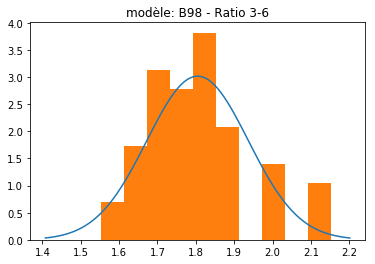

(1.804714336480421, 0.017480625035845406, 48)

In [12]:
fct_final(df_ex,'B98',3,6)

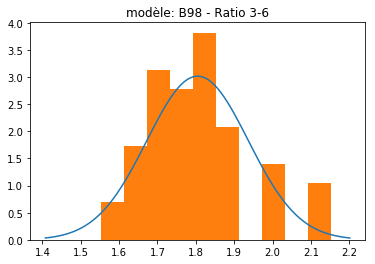

Espérance:  1.804714336480421  Variance:  0.017480625035845406  Nombre de Réalisation:  48


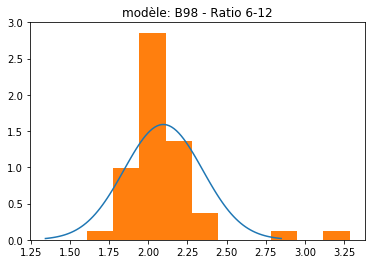

Espérance:  2.0963353076673665  Variance:  0.06286140246468382  Nombre de Réalisation:  48


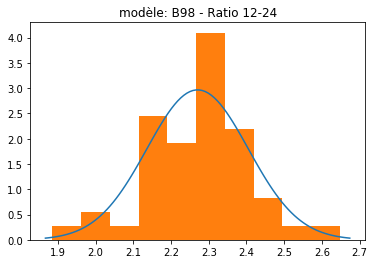

Espérance:  2.2704708893927905  Variance:  0.01809343024766989  Nombre de Réalisation:  48


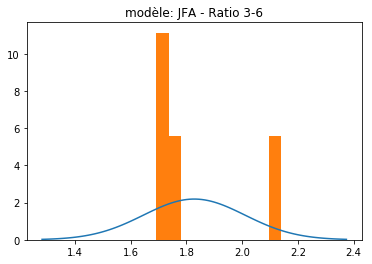

Espérance:  1.8279480504395278  Variance:  0.03314299297135083  Nombre de Réalisation:  4


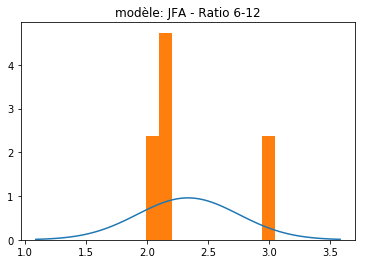

Espérance:  2.3340940689912593  Variance:  0.17303143871807672  Nombre de Réalisation:  4


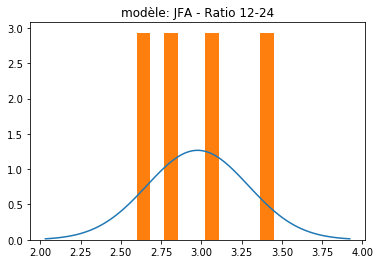

Espérance:  2.97658596082203  Variance:  0.09914646660370235  Nombre de Réalisation:  4


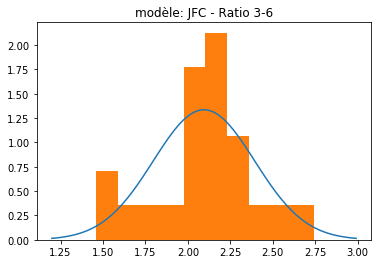

Espérance:  2.094949795592628  Variance:  0.08925939843300391  Nombre de Réalisation:  22


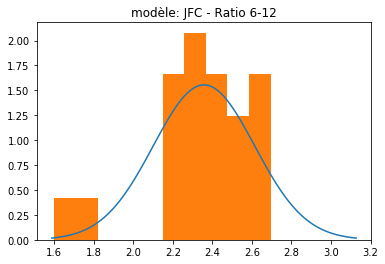

Espérance:  2.3578835157264315  Variance:  0.0657958049693761  Nombre de Réalisation:  22


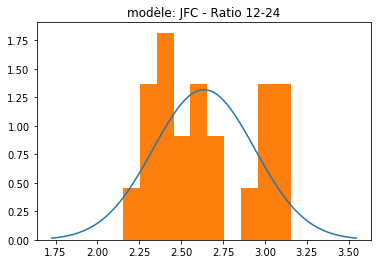

Espérance:  2.636579285728173  Variance:  0.09177412167693545  Nombre de Réalisation:  22


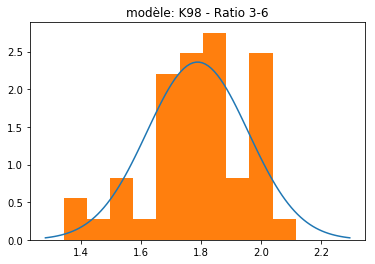

Espérance:  1.7893390232381656  Variance:  0.02854342859329058  Nombre de Réalisation:  47


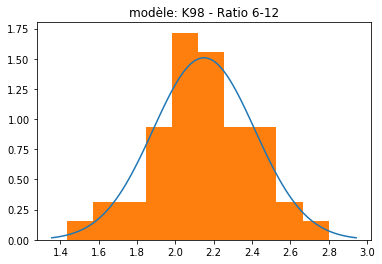

Espérance:  2.1490562164874487  Variance:  0.06997590245483247  Nombre de Réalisation:  47


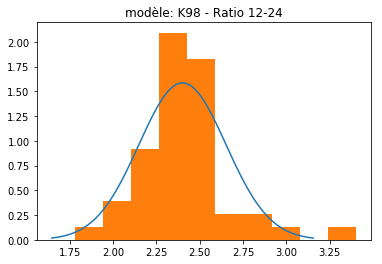

Espérance:  2.400456126341235  Variance:  0.06331949536084745  Nombre de Réalisation:  47


In [13]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        x_,v_,nb_real = fct_final(df_ex,key,Ind[i],Ind[i+1])
        print("Espérance: ",x_," Variance: ",v_," Nombre de Réalisation: ",nb_real)

## Test de Lilliefors d'adéquation famille lois gaussiennes:

In [14]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro
from scipy.stats import normaltest

In [15]:
def fct_test_lilli(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = list_ratio(df_v,n,m)
    ksstat,p_val = lilliefors(L,dist='norm',pvalmethod='table')
    print("Lilliefors modèle "+name+" ratio "+str(n)+"-"+str(m)+": p_value = ",p_val," statistique = ",ksstat)

In [16]:
def fct_test_shapiro(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = list_ratio(df_v,n,m)
    ksstat,p_val = shapiro(L)
    print("Shapiro modèle "+name+" ratio "+str(n)+"-"+str(m)+": p_value = ",p_val," statistique = ",ksstat)

In [17]:
def fct_test_agostino(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = list_ratio(df_v,n,m)
    if(len(L)>8):
        ksstat,p_val = normaltest(L)
        print("Agostino modèle "+name+" ratio "+str(n)+"-"+str(m)+": p_value = ",p_val," statistique = ",ksstat)

In [18]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        fct_test_lilli(df_ex,key,Ind[i],Ind[i+1])

Lilliefors modèle B98 ratio 3-6: p_value =  0.1010321618083724  statistique =  0.12170977807179406
Lilliefors modèle B98 ratio 6-12: p_value =  0.001  statistique =  0.1997837973980946
Lilliefors modèle B98 ratio 12-24: p_value =  0.2  statistique =  0.09999606084370344
Lilliefors modèle JFA ratio 3-6: p_value =  0.04382283706927103  statistique =  0.3817138757109243
Lilliefors modèle JFA ratio 6-12: p_value =  0.06103649271075766  statistique =  0.3693781043735454
Lilliefors modèle JFA ratio 12-24: p_value =  0.2  statistique =  0.18171464425635042
Lilliefors modèle JFC ratio 3-6: p_value =  0.09477227470423011  statistique =  0.17078922848991404
Lilliefors modèle JFC ratio 6-12: p_value =  0.017912061683129116  statistique =  0.2083055140460688
Lilliefors modèle JFC ratio 12-24: p_value =  0.1450512519439282  statistique =  0.16055015962676578
Lilliefors modèle K98 ratio 3-6: p_value =  0.2  statistique =  0.0886550249887472
Lilliefors modèle K98 ratio 6-12: p_value =  0.2  statistiq

In [19]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        fct_test_shapiro(df_ex,key,Ind[i],Ind[i+1])

Shapiro modèle B98 ratio 3-6: p_value =  0.02783302217721939  statistique =  0.94602370262146
Shapiro modèle B98 ratio 6-12: p_value =  3.8781598732384737e-07  statistique =  0.7759870886802673
Shapiro modèle B98 ratio 12-24: p_value =  0.3448205590248108  statistique =  0.9735099673271179
Shapiro modèle JFA ratio 3-6: p_value =  0.03499540686607361  statistique =  0.7454622983932495
Shapiro modèle JFA ratio 6-12: p_value =  0.0789528638124466  statistique =  0.785701334476471
Shapiro modèle JFA ratio 12-24: p_value =  0.8861525654792786  statistique =  0.9773229956626892
Shapiro modèle JFC ratio 3-6: p_value =  0.24530649185180664  statistique =  0.9445443749427795
Shapiro modèle JFC ratio 6-12: p_value =  0.006033449433743954  statistique =  0.8638756275177002
Shapiro modèle JFC ratio 12-24: p_value =  0.06105939671397209  statistique =  0.9153915047645569
Shapiro modèle K98 ratio 3-6: p_value =  0.2806715667247772  statistique =  0.9706609845161438
Shapiro modèle K98 ratio 6-12: p_v

In [20]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        fct_test_agostino(df_ex,key,Ind[i],Ind[i+1])

Agostino modèle B98 ratio 3-6: p_value =  0.03327576771678204  statistique =  6.8058516861757274
Agostino modèle B98 ratio 6-12: p_value =  6.39776183997448e-11  statistique =  46.94497561247309
Agostino modèle B98 ratio 12-24: p_value =  0.19292312444767323  statistique =  3.2909269767025577
Agostino modèle JFC ratio 3-6: p_value =  0.4518605680987049  statistique =  1.588763248793317
Agostino modèle JFC ratio 6-12: p_value =  0.0026416138248300408  statistique =  11.872730502611763
Agostino modèle JFC ratio 12-24: p_value =  0.09370518690496729  statistique =  4.7352034695201715
Agostino modèle K98 ratio 3-6: p_value =  0.2863664752516618  statistique =  2.500965812865472
Agostino modèle K98 ratio 6-12: p_value =  0.5849674144967  statistique =  1.0723982700334425
Agostino modèle K98 ratio 12-24: p_value =  1.5881398517559816e-05  statistique =  22.100724076333236


## Analyse du log du ratio

In [85]:
def log_list_ratio(df,n,m):
    R = []
    for index,row in df.iterrows():
        R.append(np.log(row[m]/row[n]))
    return R

def fct_test_lilli_log(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = log_list_ratio(df_v,n,m)
    ksstat,p_val = lilliefors(L,dist='norm',pvalmethod='table')
    print("Lilliefors modèle "+name+" ratio "+str(n)+"-"+str(m)+": p_value = ",p_val," statistique = ",ksstat)
    
def fct_test_shapiro_log(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = log_list_ratio(df_v,n,m)
    ksstat,p_val = shapiro(L)
    print("Shapiro modèle "+name+" ratio "+str(n)+"-"+str(m)+": p_value = ",p_val," statistique = ",ksstat)
    
def fct_test_agostino_log(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = log_list_ratio(df_v,n,m)
    if(len(L)>8):
        ksstat,p_val = normaltest(L)
        print("Agostino modèle "+name+" ratio "+str(n)+"-"+str(m)+": p_value = ",p_val," statistique = ",ksstat)
        
def fct_final_log(df,name,n,m):
    df_v = extract(df,name,n,m)
    L = log_list_ratio(df_v,n,m)
    x_,v_,nb_real = plot_histo(L,name,n,m)
    return x_,v_,nb_real

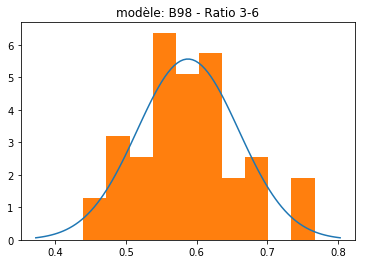

Espérance:  0.5877973802880474  Variance:  0.005139658143474513  Nombre de Réalisation:  48


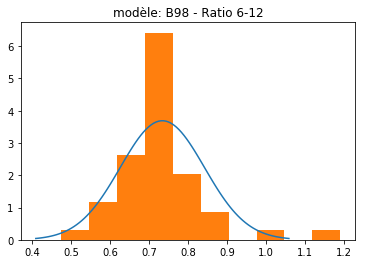

Espérance:  0.7339787664496212  Variance:  0.01168566253836076  Nombre de Réalisation:  48


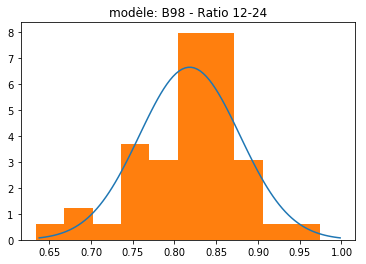

Espérance:  0.8182014892929185  Variance:  0.0036078753729213305  Nombre de Réalisation:  48


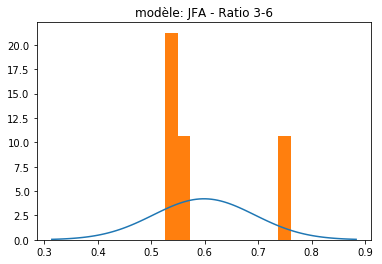

Espérance:  0.5985464876115951  Variance:  0.008992225228256906  Nombre de Réalisation:  4


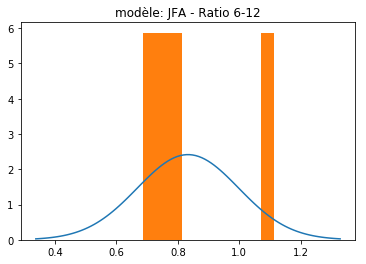

Espérance:  0.8332563238843425  Variance:  0.027288904504810647  Nombre de Réalisation:  4


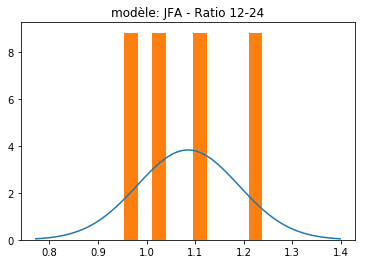

Espérance:  1.085279377700334  Variance:  0.010902752278628344  Nombre de Réalisation:  4


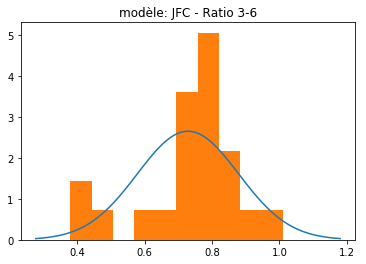

Espérance:  0.7286297131384618  Variance:  0.022696267762876567  Nombre de Réalisation:  22


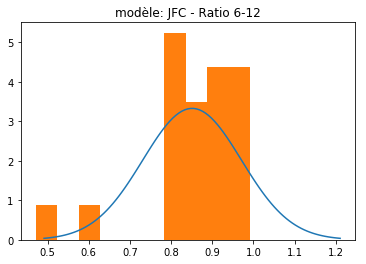

Espérance:  0.8510443891726776  Variance:  0.014376660152576047  Nombre de Réalisation:  22


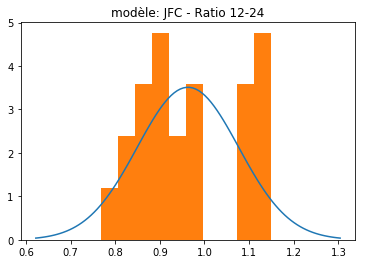

Espérance:  0.9629768308484606  Variance:  0.0129214480793375  Nombre de Réalisation:  22


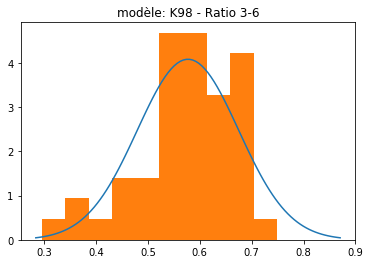

Espérance:  0.5771806159443552  Variance:  0.009567557479540282  Nombre de Réalisation:  47


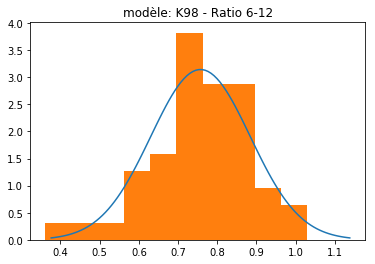

Espérance:  0.7571656802298923  Variance:  0.016108691388882518  Nombre de Réalisation:  47


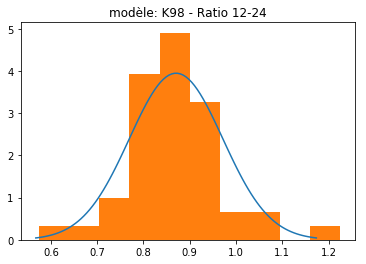

Espérance:  0.870454228987757  Variance:  0.010201880283131001  Nombre de Réalisation:  47


In [86]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        x_,v_,nb_real = fct_final_log(df_ex,key,Ind[i],Ind[i+1])
        print("Espérance: ",x_," Variance: ",v_," Nombre de Réalisation: ",nb_real)

In [22]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        fct_test_lilli_log(df_ex,key,Ind[i],Ind[i+1])

Lilliefors modèle B98 ratio 3-6: p_value =  0.2  statistique =  0.10740167678935253
Lilliefors modèle B98 ratio 6-12: p_value =  0.00415312943858519  statistique =  0.17102769560938913
Lilliefors modèle B98 ratio 12-24: p_value =  0.17959003986357902  statistique =  0.11146547622624786
Lilliefors modèle JFA ratio 3-6: p_value =  0.05214951662246943  statistique =  0.37471029002651834
Lilliefors modèle JFA ratio 6-12: p_value =  0.0870139209781614  statistique =  0.35379164741310315
Lilliefors modèle JFA ratio 12-24: p_value =  0.2  statistique =  0.16369299867204656
Lilliefors modèle JFC ratio 3-6: p_value =  0.026582948489016118  statistique =  0.201845703375683
Lilliefors modèle JFC ratio 6-12: p_value =  0.0036089097839372775  statistique =  0.23990638509127452
Lilliefors modèle JFC ratio 12-24: p_value =  0.2  statistique =  0.1499167150935924
Lilliefors modèle K98 ratio 3-6: p_value =  0.2  statistique =  0.10713684926273956
Lilliefors modèle K98 ratio 6-12: p_value =  0.2  statis

In [23]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        fct_test_shapiro_log(df_ex,key,Ind[i],Ind[i+1])

Shapiro modèle B98 ratio 3-6: p_value =  0.1324719786643982  statistique =  0.9629209637641907
Shapiro modèle B98 ratio 6-12: p_value =  3.541867408785038e-05  statistique =  0.8578712344169617
Shapiro modèle B98 ratio 12-24: p_value =  0.16594526171684265  statistique =  0.9653552770614624
Shapiro modèle JFA ratio 3-6: p_value =  0.04564083740115166  statistique =  0.7578734755516052
Shapiro modèle JFA ratio 6-12: p_value =  0.13167540729045868  statistique =  0.8148711919784546
Shapiro modèle JFA ratio 12-24: p_value =  0.9475066065788269  statistique =  0.9880927801132202
Shapiro modèle JFC ratio 3-6: p_value =  0.052935242652893066  statistique =  0.912372350692749
Shapiro modèle JFC ratio 6-12: p_value =  0.0007361939642578363  statistique =  0.8105854988098145
Shapiro modèle JFC ratio 12-24: p_value =  0.10615058988332748  statistique =  0.9269798398017883
Shapiro modèle K98 ratio 3-6: p_value =  0.051342833787202835  statistique =  0.9518845677375793
Shapiro modèle K98 ratio 6-1

In [24]:
Ind = [3,6,12,24]
for key,value in dict.items():
    for i in range(len(Ind)-1):
        fct_test_agostino_log(df_ex,key,Ind[i],Ind[i+1])

Agostino modèle B98 ratio 3-6: p_value =  0.14945120216027422  statistique =  3.8015706927768567
Agostino modèle B98 ratio 6-12: p_value =  2.8016327647292117e-07  statistique =  30.175786546942224
Agostino modèle B98 ratio 12-24: p_value =  0.06373286238543592  statistique =  5.506109912820204
Agostino modèle JFC ratio 3-6: p_value =  0.11049175211385702  statistique =  4.405628804627403
Agostino modèle JFC ratio 6-12: p_value =  0.00016100413742679528  statistique =  17.46816099001386
Agostino modèle JFC ratio 12-24: p_value =  0.12433375965108187  statistique =  4.169571438366465
Agostino modèle K98 ratio 3-6: p_value =  0.046485418993069176  statistique =  6.13723317120743
Agostino modèle K98 ratio 6-12: p_value =  0.061030355279578154  statistique =  5.592767822100556
Agostino modèle K98 ratio 12-24: p_value =  0.004786389585140107  statistique =  10.683957783636851


## Matrice de corrélation entre les ratios:

In [56]:
##### Kolmogorov Smirnov
# Anderssen ???
# Regarder les corrélations + jarter trois premiers mois et dernier mois car peu cohérents

def correlation(L,M):
    sig1 = np.sqrt(np.var(L))
    sig2 = np.sqrt(np.var(M))
    m1 = np.mean(L)
    m2 = np.mean(M)
    s = 0
    for i in range(len(L)):
        s += L[i]*M[i]
    s = s/len(L)
    return (s-m1*m2)/(sig1*sig2)
        
def var(L,M):    
    m1 = np.mean(L)
    m2 = np.mean(M)
    s = 0
    for i in range(len(L)):
        s += L[i]*M[i]
    s = s/len(L)
    return s-m1*m2


def Mat_Var(df,name):
    Ind = [3,6,12,24]
    X = []
    M = []
    for i in range(len(Ind)-1):
        df_v = extract(df,name,Ind[i],Ind[i+1])
        L = list_ratio(df_v,Ind[i],Ind[i+1])
        M.append(L)
        X.append(np.mean(L))
    Mat = np.zeros((len(Ind)-1,len(Ind)-1))
    for i in range(len(Mat)):
        for j in range(len(Mat)):
            Mat[i][j] = var(M[i],M[j])
    return Mat,X

def Mat_cor(df,name):
    Ind = [3,6,12,24]
    M = []
    for i in range(len(Ind)-1):
        df_v = extract(df,name,Ind[i],Ind[i+1])
        L = list_ratio(df_v,Ind[i],Ind[i+1])
        M.append(L)
    Mat = np.zeros((len(Ind)-1,len(Ind)-1))
    for i in range(len(Mat)):
        for j in range(len(Mat)):
            Mat[i][j] = correlation(M[i],M[j])
    return Mat

def  loi(df,name):
    Mat, X = Mat_Var(df,name)
    return X,Mat
       
X,V = loi(df_ex,'B98')
print(X,V)

[1.804714336480421, 2.0963353076673665, 2.2704708893927905] [[0.01748063 0.01075    0.00900843]
 [0.01075    0.0628614  0.01971723]
 [0.00900843 0.01971723 0.01809343]]


In [26]:
def simu_borne(X,V,alpha,N):
    T = []
    for i in range(N):
        X_t = np.random.multivariate_normal(X,V)
        s = 1
        for j in X_t:
            s *= j
        T.append(s)
    T.sort()
    ind = int(np.floor(alpha*N))
    return T[ind]

simu_borne(X,V,0.95,10000)

11.688905965494849

## Matrice de corrélation entre les mois:

corrélation entre les mois de fab ou vérifier la correlation entre t et t+1

In [27]:
Ind = [3,6,12,24]

def liste_ratio(df,name):
    H = []
    for i in range(len(Ind)-1):
        df_v = extract(df,name,Ind[i],Ind[i+1])
        L = list_ratio(df_v,Ind[i],Ind[i+1])
        H.append(L)
    return H

def extract_list(H,k):
    C = []
    for i in range(len(H)):
        C.append(H[i][k])
    return C


def Mat_corr_mois(H):
    K = []
    for i in range(len(H[0])):
        Temp = []
        L1 = extract_list(H,i)
        for j in range(len(H[0])):
            L2 = extract_list(H,j)
            Temp.append(correlation(L1,L2))
        K.append(Temp)
    return K

def fct_final_mat_cor(df,name):
    H = liste_ratio(df,name)
    Mat = Mat_corr_mois(H)
    return Mat

def autocorr(df,name):
    Mat = fct_final_mat_cor(df,name)
    M = []
    for i in range(len(Mat)-1):
        M.append(Mat[i][i+1])
    return M

#print(fct_final_mat_cor(df_ex,'B98'))
print(autocorr(df_ex,'B98'))

[0.9999975011076185, 0.7225420407266384, 0.7806124725998486, 0.8495155334679438, 0.9764888046390643, 0.8932385618928226, 0.6678887748329115, 0.9322004865857683, 0.9784562107951846, 0.9976454358104833, 0.9465445844297161, 0.990749352335675, 0.9736960453663724, 0.9377364381890221, 0.8966769904982196, 0.823322455893548, 0.9770035015495423, 0.9123469627834774, 0.933918303443706, 0.9979752900737088, 0.9945672646819033, 0.9825702594107123, 0.9596098116508065, -0.26000491191175634, 0.279467375582553, 0.9774524081871399, 0.9555575268859828, 0.8772356684367605, 0.8971937176311567, 0.998152571050613, 0.9976570892219742, 0.9054921963156439, 0.9852247291293553, 0.9996714302281373, 0.9032260027765826, 0.9137107612989719, 0.9819202678971949, 0.9353396534335903, 0.9975206225527963, 0.9588059495420441, 0.9502501053702844, 0.9998257199383065, 0.8550843276590634, 0.922733529202899, 0.9906312935335541, 0.9090903508888254, 0.907232753602231]


## Simulation:

In [79]:
#def nouvelle_loi(X,V,real):
#    T=[]
#    T2 = []
#    for i in range(1,len(V)):
#        Temp = []
#        T2.append([V[i][0]])
#        for j in range(1,len(V)):
#            Temp.append(V[i][j])
#        T.append(Temp)
#    T2 = np.array(T2)
#    X_new = X[1:]+1/V[0][0]*(real-X[0])*(V[:][0])[1:]
#    V_new = Temp - 1/V[0][0]*np.matmul(T2,T2.T)
#    return X_new,V_new

def nouv_loi(X,V,L):
    n = len(L)
    p = len(X)-n
    
    
    #creating mu1 and a
    mu1 = []
    a = []
    for i in range(0,n):
        mu1.append([X[i]])
        a.append([L[i]])
    mu1 = np.asarray(mu1)
    a = np.asarray(a)
    
    #creating mu2
    mu2 = []
    for i in range(n,len(X)):
        mu2.append([X[i]])
    mu2 = np.asarray(mu2)
    
    # creating sigma_2_1
    sigma_2_1 =[]
    for i in range(n,len(X)):
        temp = []
        for j in range(n):
            temp.append(V[i][j])
        sigma_2_1.append(temp)
    sigma_2_1 = np.asarray(sigma_2_1)
    
    #creating sigma_1_1
    sigma_1_1 = []
    for i in range(n):
        temp =[]
        for j in range(n):
            temp.append(V[i][j])
        sigma_1_1.append(temp)
    simga_1_1 = np.asarray(sigma_1_1)
    
    #creating sigma_1_2
    sigma_1_2 = []
    for i in range(n):
        temp = []
        for j in range(n,len(X)):
            temp.append(V[i][j])
        sigma_1_2.append(temp)
    sigma_2_1 = np.asarray(sigma_2_1)
    
    #creating sigma_2_2
    sigma_2_2 = []
    for i in range(n,len(X)):
        temp = []
        for j in range(n,len(X)):
            temp.append(V[i][j])
        sigma_2_2.append(temp)
    sigma_2_2 = np.asarray(sigma_2_2)
    
    mu_new = mu2 + np.dot(np.dot(sigma_2_1,np.linalg.inv(sigma_1_1)),(a-mu1))
    mu_new_f = []
    mu_new = mu_new.tolist()
    for i in range(len(mu_new)):
        mu_new_f.append(mu_new[i][0])

    V_new = sigma_2_2 - np.dot(np.dot(sigma_2_1,np.linalg.inv(sigma_1_1)),sigma_1_2)
    return mu_new_f,V_new



X_new,V_new = nouv_loi(X,V,[2])
print("resultat")
print(X_new,V_new)
X_new2,V_new2 = nouv_loi(X,V,[2,2])
print("second resultat")
print(X_new2,V_new2)

resultat
[2.21642942520121, 2.37110899793008] [[0.05625052 0.01417735]
 [0.01417735 0.01345105]]
second resultat
[2.3165602383343287] [[0.00987779]]


## Cross validation:

In [62]:
def list_ratio_supp(df,n,m,k):
    R = []
    for index,row in df.iterrows():
        R.append(row[m]/row[n])
    del R[k]
    return R

def Mat_Var(df,name,k):
    Ind = [3,6,12,24]
    X = []
    M = []
    for i in range(len(Ind)-1):
        df_v = extract(df,name,Ind[i],Ind[i+1])
        L = list_ratio_supp(df_v,Ind[i],Ind[i+1],k)
        M.append(L)
        X.append(np.mean(L))
    Mat = np.zeros((len(Ind)-1,len(Ind)-1))
    for i in range(len(Mat)):
        for j in range(len(Mat)):
            Mat[i][j] = var(M[i],M[j])
    return Mat,X

def loi_supp(df,name,k):
    Mat, X = Mat_Var(df,name,k)
    return X,Mat

def cout_ligne(df,name,k,deb = 0):
    Ind = [3,6,12,24]
    C = 1
    for i in range(deb,len(Ind)-1):
        df_t = extract(df,name,Ind[i],Ind[i+1])
        L = list_ratio(df_t,Ind[i],Ind[i+1])
        C*=L[k]
    return C
    
def validation(df,name,alpha,N):
    cpt = 0
    df_temp = extract(df,name,3,6)
    n = len(df_temp.index)
    for i in range(n):
        X,Mat = loi_supp(df,name,i)
        q = simu_borne(X,Mat,alpha,N)
        c = cout_ligne(df,name,i)
        if(c<q):
            cpt+=1
    return cpt/n

In [30]:
for key,value in dict.items():
    print("ratio de validation "+key+" ",validation(df_ex,key,0.95,1000))

ratio de validation B98  0.9375
ratio de validation JFA  0.75
ratio de validation JFC  0.9545454545454546
ratio de validation K98  0.9148936170212766


In [31]:
# Calcul du produit des 3 ratios pour un véhicule:
K = []
for i in range(48):
    K.append(cout_ligne(df_ex,'B98',i))
print(K)

[14.521811820435108, 14.83875570523025, 11.121733322248172, 4.707939151874714, 8.598017520141216, 8.133486609615716, 9.292249087712372, 9.422979763559102, 10.637146075009579, 8.68940557202392, 7.864055634208443, 7.514318620037999, 8.59661042061772, 9.563973012486196, 8.832768602413674, 9.743111243321675, 8.090865041034379, 7.59135012303149, 8.281465093325211, 8.988861424328869, 7.912540126432368, 8.394058768205626, 9.720214861232979, 7.722040559910096, 9.801479967942422, 9.009607298234299, 8.278960225161397, 7.695282126191061, 8.254034836384806, 8.902307339306333, 7.0799905904773315, 6.905652195924286, 6.00584827410822, 6.186913811947944, 6.926140048512058, 6.430523603570441, 7.086128795551328, 7.331196547348508, 7.91392906299787, 8.67481719473294, 9.217153800545299, 9.806944961441527, 8.862219796623226, 11.601838638998183, 8.345166409949547, 9.542598276776744, 8.899892063533906, 8.52336648679754]


## Cross validation avec une réalisation:

In [82]:
def validation_1(df,name,alpha,N,val = -1):
    cpt = 0
    df_temp = extract(df,name,3,6)
    n = len(df_temp.index)
    for i in range(n):
        # On apprend la loi
        X,Mat = loi_supp(df,name,i)
        # On cherche la réalisation du ratio 3/6 du lot i 
        if(val == -1):
            df_temp = extract(df,name,3,6)
            L = list_ratio(df_temp,3,6)
            val = L[i]
        # On calcule la nouvelle loi (avec la réalisation du lot i)
        X_new,V_new = nouv_loi(X,Mat,[val])
        
        #calcule de la borne pour la nouvelle loi:
        q = simu_borne(X_new,V_new,alpha,N)
        c = cout_ligne(df,name,i,1)
        if(c<q):
            cpt+=1
    return cpt/n


def graph_validation(df,name,alpha,N):
    X = np.linspace(1.6,2.4,30)
    R = []
    for i in X:
        R.append(validation_1(df,name,alpha,N,i))
    print(R)
    plt.plot(X,R)
    plt.show()
    

In [83]:
for key,value in dict.items():
    print("ratio de validation "+key+" ",validation_1(df_ex,key,0.95,100))

ratio de validation B98  0.9375
ratio de validation JFA  0.75
ratio de validation JFC  1.0
ratio de validation K98  0.9148936170212766


[0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9375, 0.9583333333333334, 0.9375, 0.9375, 0.9583333333333334, 0.9583333333333334, 0.9375, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666, 0.9791666666666666]


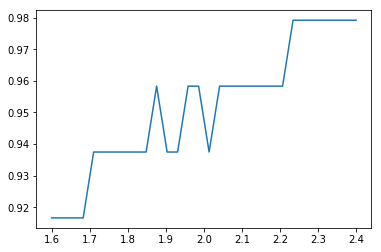

In [84]:
graph_validation(df_ex,'B98',0.95,100)

## Extension aux 24 ratios

In [32]:
indt = [i for i in range(24)]
print(indt)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [33]:
def create_mat(df,name):
    M = []
    df_t = extract(df,name,0,1)
    n = len(list_ratio(df_t,0,1))
    for i in range(n):
        M.append([])
    for i in range(24):
        df_t = extract(df,name,i,i+1)
        L = list_ratio(df_t,i,i+1)
        for j in range(n):
            M[j].append(L[j])
    X = []
    V = []
    for j in range(n):
        x_ = np.mean(M[j])
        v_ = np.var(M[j])
        X.append(x_)
        V.append(v_)
        for i in range(24):
            M[j][i] = (M[j][i]-x_)/np.sqrt(v_)
    return M,X,V

M,X_,V_ = create_mat(df_ex,'B98')
print(M)

# Une courbe par mois de fab

[[4.610199865135976, 0.7487979598376637, 0.10154151154077559, 0.01155959475850849, -0.08554621181829972, -0.16609926451543283, -0.17628634272306198, -0.1397615433148404, -0.02911703868617529, -0.016518059622383566, -0.029403149917193082, 0.05615618616802924, -0.17499402445934453, -0.4009484238211957, -0.4528416828648993, -0.46583668282869356, -0.4951230603851695, -0.48413992459846655, -0.48273781325342985, -0.4465212271622297, -0.4282816582850286, -0.40542952743760724, -0.3425957202808936, -0.30607376146659765], [4.599254431596037, 0.8236249608188567, 0.28473079863617357, 0.2221845457007545, -0.00032602329304133224, -0.21349796925263026, -0.2279651930180565, -0.17228890873410282, -0.1294819679958821, -0.17640683336781104, -0.2591446684155708, -0.1633224247792177, -0.30058238727734765, -0.4017238609998888, -0.4085983072516093, -0.42862701535418324, -0.4258547270783176, -0.4044935995649967, -0.3886004997984935, -0.3860579139657877, -0.38479146774330497, -0.36540870305608397, -0.357267451

## loi 24 ratios:

In [45]:
def Mat_Var_24(df,name):
    Ind = [i for i in range(24)]
    X = []
    M = []
    for i in range(len(Ind)-1):
        df_v = extract(df,name,Ind[i],Ind[i+1])
        L = list_ratio(df_v,Ind[i],Ind[i+1])
        M.append(L)
        X.append(np.mean(L))
    Mat = np.zeros((len(Ind)-1,len(Ind)-1))
    for i in range(len(Mat)):
        for j in range(len(Mat)):
            Mat[i][j] = var(M[i],M[j])
    return Mat,X

def  loi_24(df,name):
    Mat, X = Mat_Var_24(df,name)
    return X,Mat
       
X,V = loi_24(df_ex,'B98')
print(X,V)
print(len(X))
print(len(V))

[4.555885747941733, 1.6067179721508686, 1.371833839953408, 1.2708125991788732, 1.2103785009111319, 1.1721331810384428, 1.1542268485012819, 1.1393286610148792, 1.1303613155825574, 1.114375070202859, 1.1033284517493955, 1.1419734588185289, 1.1162505461737267, 1.081351408148432, 1.0759145529550174, 1.06603458677149, 1.064654117889869, 1.061676036331215, 1.0600635752206917, 1.058485761599431, 1.057463049069937, 1.0568918021390523, 1.0625067576248672] [[ 2.65244807e+00  1.02714872e-01  6.49771107e-02 -6.20358908e-03
  -8.59609509e-03 -1.62016640e-03 -1.00715065e-02 -1.59059962e-02
   1.96482114e-03 -1.48668073e-02 -1.67617050e-02 -5.12626806e-03
   8.67623118e-04  5.36307605e-04 -1.22830566e-03 -1.89817384e-03
  -3.91404871e-03 -5.64674383e-03 -1.07640895e-02 -5.27197649e-03
  -2.40333272e-03 -2.38864205e-03 -2.36609609e-03]
 [ 1.02714872e-01  1.89013891e-02  8.42477430e-03  2.48267378e-03
   7.50953594e-04 -1.52429495e-04  1.33155924e-04 -3.31369288e-04
   1.52745079e-03  2.47745122e-04 -6

In [54]:
X_new,V_new = nouv_loi(X,V,[2,1.5])
print(len(X_new))
print(len(V_new))
print(len(V_new[0]))

21
21
21


## PCA

In [79]:
from sklearn.decomposition import PCA

pcaA = PCA(n_components=4, copy=True, whiten=False)
pcaA.fit(M)
dpca = pd.DataFrame(pcaA.transform(M))

In [80]:
for i,pc in enumerate(pcaA.explained_variance_ratio_):
    print('{0}.\t{1:2.2f}%'.format(i+1,pc*100.0))

1.	74.57%
2.	8.86%
3.	5.17%
4.	4.04%


## % de la variance expliquée:

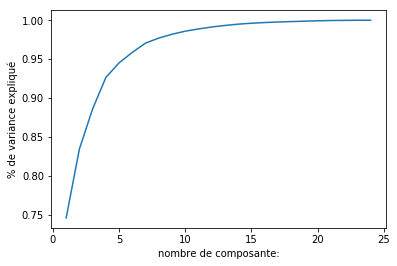

In [81]:
H = []
S = []
for i in range(1,25):
    pcaA2 = PCA(n_components=i, copy=True, whiten=False)
    pcaA2.fit(M)
    dpca2 = pd.DataFrame(pcaA2.transform(M))
    L = np.cumsum(pcaA2.explained_variance_ratio_)
    H.append(i)
    S.append(L[-1])
plt.plot(H,S)
plt.xlabel('nombre de composante:')
plt.ylabel('% de variance expliqué')
plt.show()

## Graphique des vecteurs propres normalisés

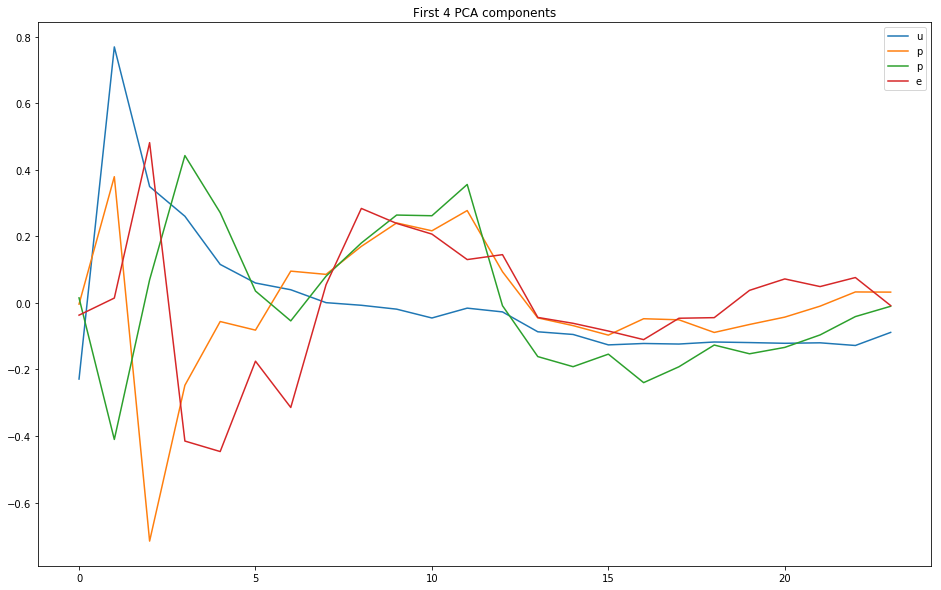

In [82]:
fig = plt.figure(figsize=(16,10))
plt.title('First {0} PCA components'.format(np.shape(np.transpose(pcaA.components_))[-1]))

plt.plot(np.transpose(pcaA.components_), label=['1. PC', '2. PC'])
plt.legend('upper right')

None


## Graphique des vecteurs propres réels

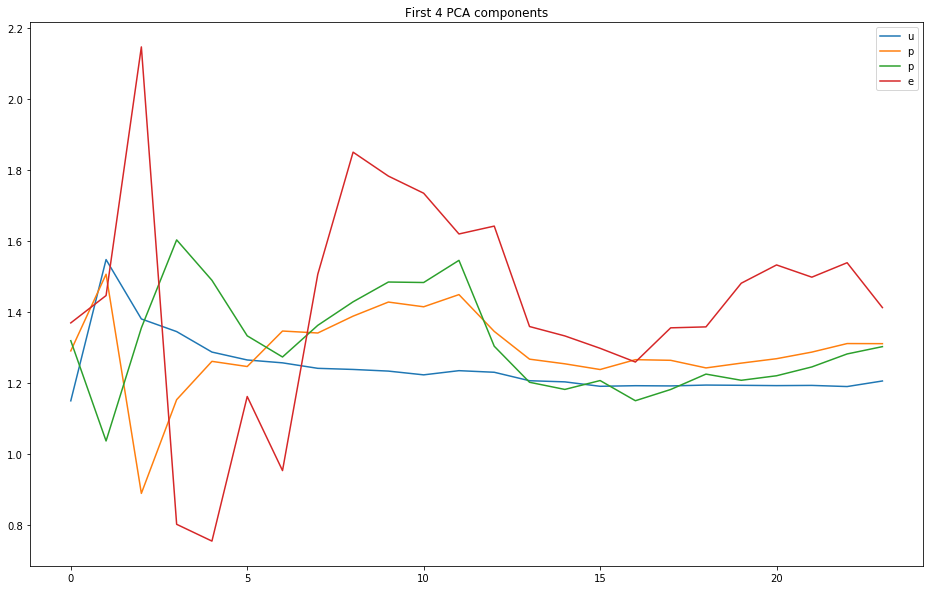

In [83]:
import copy

K = copy.deepcopy(pcaA.components_)
for i in range(len(K)):
    for j in range(len(K[i])):
        K[i][j] = np.sqrt(V_[i])*K[i][j]+X_[i]

fig = plt.figure(figsize=(16,10))        
plt.title('First {0} PCA components'.format(np.shape(np.transpose(pcaA.components_))[-1]))

plt.plot(np.transpose(K), label=['compo 1', '2. PC'])
plt.legend('upper right')

None